<a href="https://colab.research.google.com/github/SonjaWangJQ/Git-hello/blob/main/pro-processing-AmplitudeEvelope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa
import numpy as np
from matplotlib import pyplot as plt


1. load waveform   librosa.load()
2. add fuction, make max frame as amplitude envelope
3. set constant--- each frame is 1024, 50% overlap rate framing
4. draw the amplitude envolupe information

In [3]:
wavepath = r"/content/drive/MyDrive/datasound/1-ThinkPad.wav"
waveform, sample_rate = librosa.load(wavepath,sr= None) # sr = 16000

In [6]:
from inspect import currentframe
# 2 需要判断分帧补零
def Calc_Amplitude_Envelope(waveform, frame_length,hop_length):
  if len(waveform) % hop_length != 0:
    frame_num = int((len(waveform) - frame_length)/hop_length) + 1
    pad_num = frame_num*hop_length + frame_length - len(waveform) # 补多少帧
    waveform = np.pad(waveform,(0, pad_num), mode = "wrap") # 补零方式（多种）
  frame_num = int((len(waveform) - frame_length)/hop_length) + 1
  waveform_ae = []
  for t in range(frame_num):
    current_frame = waveform[t*(frame_length - hop_length): t*(frame_length- hop_length) + frame_length] #### 
    current_AE = max(current_frame)
    waveform_ae.append(current_AE)

  return np.array(waveform_ae)




In [11]:
# 3. set number
frame_size = 1024
hop_size = int(frame_size * 0.5)
waveform_AE = Calc_Amplitude_Envelope(waveform,frame_length = frame_size,hop_length = hop_size)

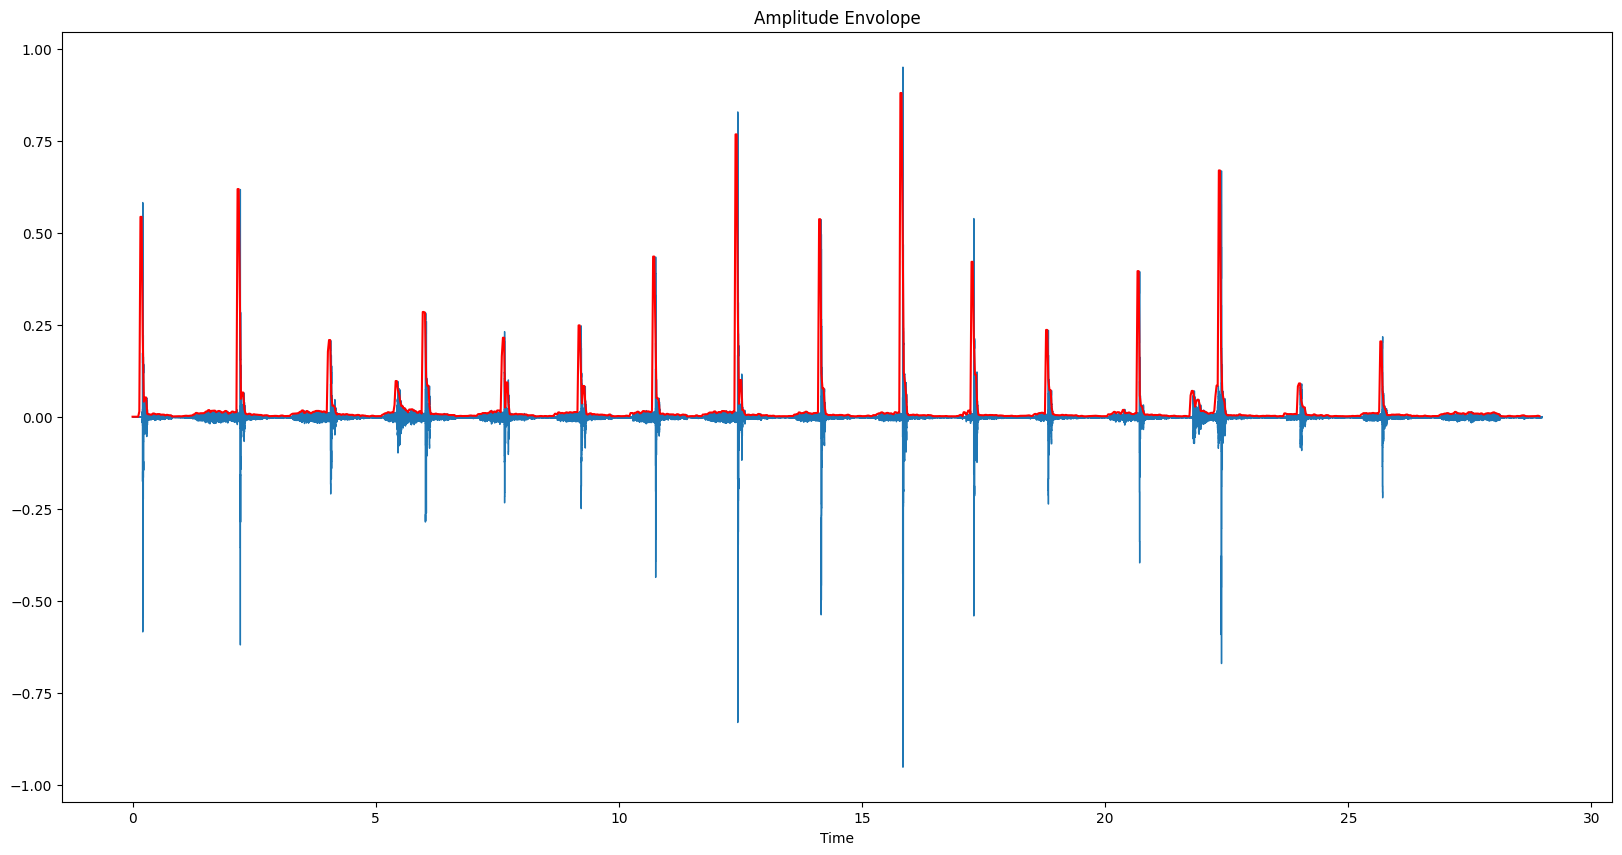

In [16]:
frame_scale = np.arange(0,len(waveform_AE)) # frame 尺度
time_scale = librosa.frames_to_time(frame_scale,hop_length=hop_size) # turn time scale
# plot
plt.figure(figsize = (20,10))
plt.plot(time_scale,waveform_AE,color = 'r')
librosa.display.waveshow(waveform)
plt.title('Amplitude Envolope')
plt.show()

In [ ]:
# feature extract
press_peaks = []